In [12]:
#Завантажити Diabetes Dataset.
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
df = pd.DataFrame(diabetes_X, columns=load_diabetes().feature_names)
df['target'] = diabetes_y

In [14]:
#Вивести перших 5 рядків
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
df.isnull().sum()
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [16]:
#Перевірити наявність дублікатів, при виявленні - видалити.
duplicates = df.duplicated()
duplicates.sum()

0

In [17]:
#Замінити бінарні ознаки. У стовпчику "Вік" спочатку перевірте унікальні значення.
unique_values = df['age'].unique()
print("Унікальні значення у стовпчику 'Вік':", unique_values)

Унікальні значення у стовпчику 'Вік': [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


In [20]:
#Перевірити тип даних. При необхідності замінити тип даних на числовий.
df.dtypes

,0
age,float64
sex,float64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


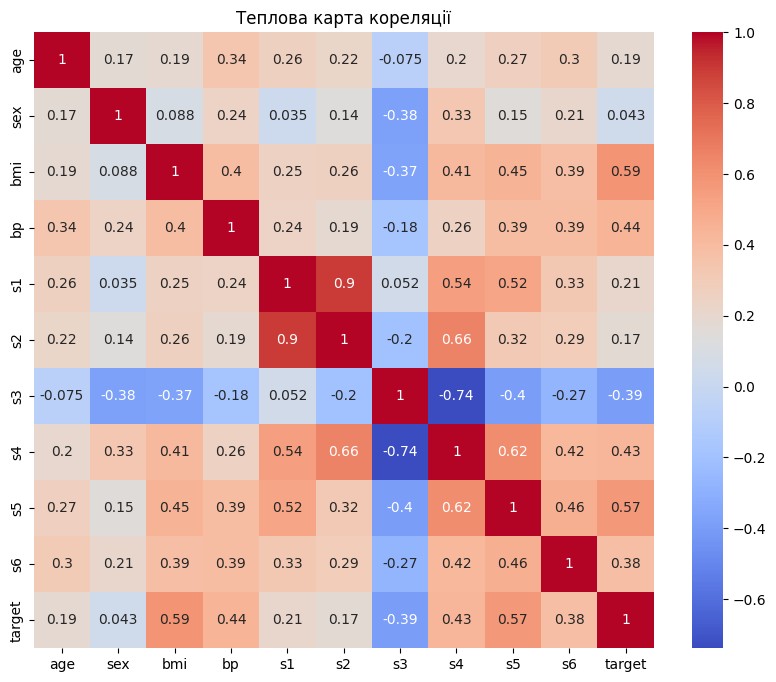

In [22]:
#Обчислити кореляцію між прогресом діабету і іншими ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

In [28]:
#Поділити дані на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)
print("\nТренувальні мітки:")
print(y_train.head())

# Виведення тестових міток
print("\nТестові мітки:")
print(y_test.head())


Тренувальні мітки:
17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

Тестові мітки:
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64


In [26]:
#Масштабувати ознаки.
scaler = StandardScaler()

# Підгонка на тренувальному наборі даних і трансформація тренувальних даних
X_train_scaled = scaler.fit_transform(X_train)

# Використання тієї ж трансформації на тестових даних
X_test_scaled = scaler.transform(X_test)

# Перетворення масштабованих масивів назад у DataFrame для зручності
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Виведення деяких даних для перевірки
print("Перші 5 рядків після масштабування (тренувальний набір):")
print(X_train_scaled_df.head())
print("\nПерші 5 рядків після масштабування (тестовий набір):")
print(X_test_scaled_df.head())

Перші 5 рядків після масштабування (тренувальний набір):
        age       sex       bmi        bp        s1        s2        s3  \
0  1.498365  1.061370  0.219902  1.138874  0.728473  1.055893 -0.824451   
1 -0.228858  1.061370 -0.419366 -0.710591 -0.424929  0.272425 -1.529791   
2  0.085182 -0.942179  1.018987  1.992473 -0.309589 -0.326699 -0.119111   
3 -0.621409 -0.942179 -0.784662 -0.639458 -1.174640 -1.215508  0.664600   
4 -0.542899 -0.942179 -1.423930 -1.706457 -0.799784 -1.110167  1.291569   

         s4        s5        s6  
0  0.711038  0.547482 -0.061449  
1  1.484286 -0.019757  0.367236  
2 -0.062210  0.331237 -0.318660  
3 -0.835458 -1.069682 -2.719299  
4 -1.608706 -0.802859 -0.918820  

Перші 5 рядків після масштабування (тестовий набір):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.948794 -0.942179 -0.168225 -0.354925  2.631586  2.649166  0.429487   
1  1.969426 -0.942179  0.745015  0.427541 -0.511434 -0.333282  0.037631   
2  1.3413

In [30]:
#Побудувати модель лінійної регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати  оптимальне число).
#Вивести коефіцієнт детермінації і середньоквадратичну помилку.
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False)

for num_features in range(1, len(correlation_with_target) + 1):
    selected_features = correlation_with_target.head(num_features).index.tolist()

    linear_reg = LinearRegression()
    linear_reg.fit(X_train_scaled, y_train)
    y_pred_linear = linear_reg.predict(X_test_scaled)

    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train_scaled, y_train)
    y_pred_rf = rf_reg.predict(X_test_scaled)

    r2_linear = r2_score(y_test, y_pred_linear)
    r2_rf = r2_score(y_test, y_pred_rf)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    print(f"\nДля {num_features} ознак:")
    print(f"Лінійна регресія - R^2: {r2_linear:.4f}, MSE: {mse_linear:.4f}")
    print(f"RandomForest регресія - R^2: {r2_rf:.4f}, MSE: {mse_rf:.4f}")


Для 1 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 2 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 3 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 4 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 5 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 6 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 7 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 8 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429, MSE: 2951.7448

Для 9 ознак:
Лінійна регресія - R^2: 0.4526, MSE: 2900.1936
RandomForest регресія - R^2: 0.4429

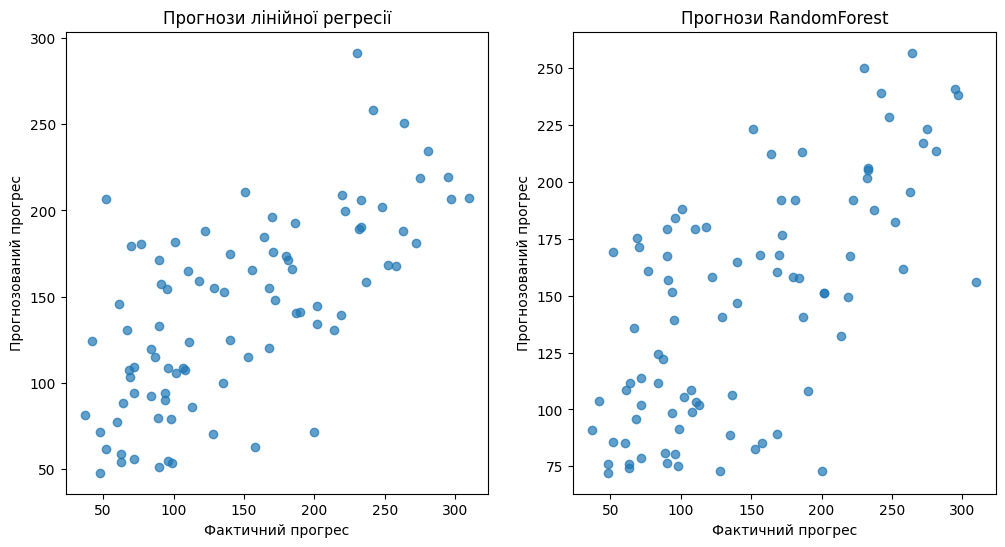

In [32]:
#Побудувати графіки.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.7)
plt.xlabel('Фактичний прогрес')
plt.ylabel('Прогнозований прогрес')
plt.title('Прогнози лінійної регресії')

# Побудувати графік прогнозів проти фактичних значень для RandomForest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Фактичний прогрес')
plt.ylabel('Прогнозований прогрес')
plt.title('Прогнози RandomForest')

plt.show()

In [ ]:
#Висновок: У ході виконання лабораторної роботи я проаналізувала набір даних Diabetes з бібліотеки sklearn для прогнозування прогресу діабету.
#Було виконано кілька етапів обробки даних, побудови моделей та аналізу результатів.
#Дослідження продемонструвало важливість обробки даних, вибору релевантних ознак та аналізу кореляції для побудови ефективних моделей машинного навчання.
#RandomForest регресія показала себе як більш потужний інструмент для прогнозування прогресу діабету у порівнянні з лінійною регресією, що підтверджується кращими значеннями R² та MSE.
#Ця робота підкреслює необхідність комплексного підходу до вибору моделі та кількості ознак для досягнення найкращих результатів у задачах прогнозування.
#Посилання на гітхаб: https://github.com/nastiadzen/Machine-learning